In [10]:
import pandas as pd

def fix_timestamp_order(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    correct_order = pd.DataFrame(pd.date_range(start=df['timestamp'].min(), end=df['timestamp'].max(), freq='H'), columns=['timestamp'])
    fixed_df = pd.merge(correct_order, df, on='timestamp', how='left')
    fixed_df[['tinggi', 'nama', 'isi_nilai']] = fixed_df[['tinggi', 'nama', 'isi_nilai']].fillna(0)
    
    return fixed_df

# Contoh penggunaan fungsi
data = {
    'timestamp': ['13-11-2023 0:00', '13-11-2023 2:00', '13-11-2023 3:00'],
    'tinggi': [1, 3, 4],
    'nama': ['A', 'C', 'D'],
    'isi_nilai': [100, 300, 400]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Konversi kolom timestamp menjadi tipe data datetime
fixed_df = fix_timestamp_order(df)

# Tampilkan DataFrame yang sudah diperbaiki
print(fixed_df)


            timestamp  tinggi nama  isi_nilai
0 2023-11-13 00:00:00     1.0    A      100.0
1 2023-11-13 01:00:00     0.0    0        0.0
2 2023-11-13 02:00:00     3.0    C      300.0
3 2023-11-13 03:00:00     4.0    D      400.0


In [25]:
import pandas as pd

def fix_timestamp_order(df):
    # Konversi kolom timestamp menjadi tipe data datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Membuat DataFrame baru dengan urutan timestamp yang benar
    correct_order = pd.DataFrame(pd.date_range(start=df['timestamp'].min(), end=df['timestamp'].max(), freq='H'), columns=['timestamp'])
    
    # Menggabungkan DataFrame baru dengan DataFrame awal untuk mendapatkan nilai kolom ketinggian, status_siaga, cuaca, dan name_pintu_air yang benar
    fixed_df = pd.merge(correct_order, df, on='timestamp', how='left')
    
    # Mengisi nilai NaN pada kolom yang bukan kolom timestamp dengan nilai dari baris sebelumnya
    fixed_df = fixed_df.fillna(method='ffill')
    
    return fixed_df

# Contoh penggunaan fungsi
data = {
    'timestamp': ['01-11-2021 0:00', '01-11-2021 11:00', '01-11-2021 12:00',
                   '01-11-2021 13:00', '01-11-2021 14:00', '01-11-2021 15:00', '01-11-2021 16:00',
                   '01-11-2021 17:00', '01-11-2021 19:00', '01-11-2021 20:00',
                   '01-11-2021 21:00', '01-11-2021 22:00', '02-11-2021 00:00'],
    'ketinggian': [ 650, 645, 635, 630, 650, 670, 670, 670, 660, 650, 645, 645, 645],
    'status_siaga': [ 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    'cuaca': [ 'Terang', 'Terang', 'Mendung Tipis', 'Mendung', 'Hujan',
              'Mendung', 'Mendung', 'Mendung', 'Gerimis', 'Mendung', 'Mendung', 'Mendung', 'Mendung'],
    'name_pintu_air': ['Manggarai BKB'] * 13
}

df = pd.DataFrame(data)
fixed_df = fix_timestamp_order(df)

# Tampilkan DataFrame yang sudah diperbaiki
print(fixed_df)


              timestamp  ketinggian  status_siaga    cuaca name_pintu_air
0   2021-01-11 00:00:00       650.0           4.0   Terang  Manggarai BKB
1   2021-01-11 01:00:00       650.0           4.0   Terang  Manggarai BKB
2   2021-01-11 02:00:00       650.0           4.0   Terang  Manggarai BKB
3   2021-01-11 03:00:00       650.0           4.0   Terang  Manggarai BKB
4   2021-01-11 04:00:00       650.0           4.0   Terang  Manggarai BKB
..                  ...         ...           ...      ...            ...
740 2021-02-10 20:00:00       645.0           4.0  Mendung  Manggarai BKB
741 2021-02-10 21:00:00       645.0           4.0  Mendung  Manggarai BKB
742 2021-02-10 22:00:00       645.0           4.0  Mendung  Manggarai BKB
743 2021-02-10 23:00:00       645.0           4.0  Mendung  Manggarai BKB
744 2021-02-11 00:00:00       645.0           4.0  Mendung  Manggarai BKB

[745 rows x 5 columns]


In [35]:
from datetime import datetime, timedelta

def cek_timeseries(data):
    # Konversi data ke dalam format yang lebih mudah diolah
    timestamps = [datetime.strptime(line[0], "%d/%m/%Y %H:%M:%S") for line in data[1:]]  # Mulai dari indeks 1 karena indeks 0 adalah header

    # Tentukan rentang waktu yang diharapkan
    start_time = timestamps[0]
    end_time = timestamps[-1]
    expected_times = [start_time + timedelta(hours=i) for i in range(int((end_time - start_time).total_seconds() / 3600) + 1)]

    # Temukan waktu yang hilang
    missing_times = [ts.strftime("%d/%m/%Y %H:%M:%S") for ts in expected_times if ts not in timestamps]

    # Tampilkan data yang tidak ada
    if missing_times:
        print("Data timeseries yang tidak ada:")
        for ts in missing_times:
            print(ts)
    else:
        print("Semua data timeseries lengkap.")

# data_timeseries = [
#     ["14/12/2021 19:00:00", 635, 4, "Mendung Tipis", "Manggarai BKB"],
#     ["14/12/2021 20:00:00", 630, 4, "Mendung Tipis", "Manggarai BKB"],
#     ["15/12/2021 23:00:00", 620, 4, "Terang", "Manggarai BKB"]
# ]

data_timeseries = pd.read_csv('Dataset TMA Manggarai - Looker.csv')
data_timeseries['timestamp'] = pd.to_datetime(data_timeseries['timestamp'], format='%d/%m/%Y %H:%M:%S')
cek_timeseries(data_timeseries)

ValueError: time data 't' does not match format '%d/%m/%Y %H:%M:%S'

In [36]:
from datetime import datetime, timedelta
import pandas as pd

def cek_timeseries(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M:%S')
    start_time = data['timestamp'].min()
    end_time = data['timestamp'].max()
    expected_times = pd.date_range(start=start_time, end=end_time, freq='H')
    missing_times = expected_times[~expected_times.isin(data['timestamp'])]

    
    if not missing_times.empty:
        print("Data timeseries yang tidak ada:")
        for ts in missing_times:
            print(ts.strftime("%d/%m/%Y %H:%M:%S"))
    else:
        print("Semua data timeseries lengkap.")

# Contoh penggunaan dengan data yang telah Anda berikan
data_timeseries = pd.read_csv('Dataset TMA Manggarai - Looker.csv')
cek_timeseries(data_timeseries)


Data timeseries yang tidak ada:
03/11/2021 21:00:00
04/11/2021 13:00:00
05/11/2021 22:00:00
07/11/2021 17:00:00
07/11/2021 21:00:00
07/11/2021 22:00:00
07/11/2021 23:00:00
15/11/2021 07:00:00
18/11/2021 04:00:00
18/11/2021 20:00:00
20/11/2021 06:00:00
04/12/2021 00:00:00
04/12/2021 11:00:00
05/12/2021 11:00:00
07/12/2021 06:00:00
07/12/2021 09:00:00
18/12/2021 21:00:00
18/12/2021 22:00:00
21/12/2021 02:00:00
29/12/2021 05:00:00
29/12/2021 21:00:00
30/12/2021 03:00:00
30/12/2021 05:00:00
06/01/2022 00:00:00
06/01/2022 06:00:00
07/01/2022 22:00:00
10/01/2022 12:00:00
10/01/2022 19:00:00
11/01/2022 12:00:00
12/01/2022 15:00:00
12/01/2022 18:00:00
20/01/2022 11:00:00
21/01/2022 03:00:00
29/01/2022 00:00:00
29/01/2022 01:00:00
29/01/2022 04:00:00
31/01/2022 00:00:00
31/01/2022 02:00:00
31/01/2022 03:00:00
31/01/2022 05:00:00
31/01/2022 06:00:00
31/01/2022 11:00:00
31/01/2022 12:00:00
01/02/2022 23:00:00
04/02/2022 08:00:00
05/02/2022 15:00:00
06/02/2022 19:00:00
07/02/2022 02:00:00
08/02/20

In [44]:
from datetime import datetime, timedelta
import pandas as pd

def cek_timeseries(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M:%S')
    start_time = data['timestamp'].min()
    end_time = data['timestamp'].max()
    expected_times = pd.date_range(start=start_time, end=end_time, freq='H')
    missing_times = expected_times[~expected_times.isin(data['timestamp'])]

    if not missing_times.empty:
        print("Data timeseries yang tidak ada:")
        for ts in missing_times:
            print(ts.strftime("%d/%m/%Y %H:%M:%S"))

        # Buat DataFrame untuk data yang hilang
        missing_data = pd.DataFrame({
            'timestamp': missing_times,
            'ketinggian': None,
            'status_siaga': None,
            'cuaca': None,
            'name_pintu_air': None
        })

        # Masukkan nilai sebelumnya ke dalam kolom yang sesuai
        missing_data['ketinggian'] = missing_data['timestamp'].apply(lambda ts: data.loc[data['timestamp'] < ts, 'ketinggian'].iloc[-1] if (data['timestamp'] < ts).any() else None)
        missing_data['status_siaga'] = missing_data['timestamp'].apply(lambda ts: data.loc[data['timestamp'] < ts, 'status_siaga'].iloc[-1] if (data['timestamp'] < ts).any() else None)
        missing_data['cuaca'] = missing_data['timestamp'].apply(lambda ts: data.loc[data['timestamp'] < ts, 'cuaca'].iloc[-1] if (data['timestamp'] < ts).any() else None)
        missing_data['name_pintu_air'] = missing_data['timestamp'].apply(lambda ts: data.loc[data['timestamp'] < ts, 'name_pintu_air'].iloc[-1] if (data['timestamp'] < ts).any() else None)

        # Gabungkan DataFrame baru dengan data awal
        data = pd.concat([data, missing_data], ignore_index=True)
        data = data.drop_duplicates(subset='timestamp', keep='first')
        data = data.sort_values(by='timestamp')

    else:
        print("Semua data timeseries lengkap.")

    return data

# Contoh penggunaan dengan data yang telah Anda berikan
data_timeseries = pd.read_csv('Dataset TMA Manggarai - Looker.csv')
data_timeseries_updated = cek_timeseries(data_timeseries)


Data timeseries yang tidak ada:
03/11/2021 21:00:00
04/11/2021 13:00:00
05/11/2021 22:00:00
07/11/2021 17:00:00
07/11/2021 21:00:00
07/11/2021 22:00:00
07/11/2021 23:00:00
15/11/2021 07:00:00
18/11/2021 04:00:00
18/11/2021 20:00:00
20/11/2021 06:00:00
04/12/2021 00:00:00
04/12/2021 11:00:00
05/12/2021 11:00:00
07/12/2021 06:00:00
07/12/2021 09:00:00
18/12/2021 21:00:00
18/12/2021 22:00:00
21/12/2021 02:00:00
29/12/2021 05:00:00
29/12/2021 21:00:00
30/12/2021 03:00:00
30/12/2021 05:00:00
06/01/2022 00:00:00
06/01/2022 06:00:00
07/01/2022 22:00:00
10/01/2022 12:00:00
10/01/2022 19:00:00
11/01/2022 12:00:00
12/01/2022 15:00:00
12/01/2022 18:00:00
20/01/2022 11:00:00
21/01/2022 03:00:00
29/01/2022 00:00:00
29/01/2022 01:00:00
29/01/2022 04:00:00
31/01/2022 00:00:00
31/01/2022 02:00:00
31/01/2022 03:00:00
31/01/2022 05:00:00
31/01/2022 06:00:00
31/01/2022 11:00:00
31/01/2022 12:00:00
01/02/2022 23:00:00
04/02/2022 08:00:00
05/02/2022 15:00:00
06/02/2022 19:00:00
07/02/2022 02:00:00
08/02/20

In [46]:
data_timeseries_updated

,timestamp,ketinggian,status_siaga,cuaca,name_pintu_air
0,2021-11-01 00:00:00,660,4,Terang,Manggarai BKB
1,2021-11-01 01:00:00,660,4,Terang,Manggarai BKB
2,2021-11-01 02:00:00,660,4,Terang,Manggarai BKB
3,2021-11-01 03:00:00,660,4,Terang,Manggarai BKB
4,2021-11-01 04:00:00,660,4,Terang,Manggarai BKB
...,...,...,...,...,...
17392,2023-11-14 19:00:00,620,4,Mendung Tipis,Manggarai BKB
17393,2023-11-14 20:00:00,620,4,Mendung Tipis,Manggarai BKB
17415,2023-11-14 21:00:00,615,4,Mendung Tipis,Manggarai BKB
17416,2023-11-14 22:00:00,610,4,Hujan,Manggarai BKB


In [47]:
data_timeseries_updated.to_csv('Dataset TMA Manggarai Looker - Updated.csv', index=False)

In [49]:
from datetime import datetime

def swap_day_month(date_str):
    # Convert the string to a datetime object
    dt_object = datetime.strptime(date_str, '%d/%m/%Y %H:%M:%S')
    
    # Swap day and month and format it back to the string
    swapped_date_str = dt_object.strftime('%m/%d/%Y %H:%M:%S')
    
    return swapped_date_str

# Example usage
original_date_str = '11/01/2021 00:00:00'
swapped_date_str = swap_day_month(original_date_str)
print(swapped_date_str)


01/11/2021 00:00:00


In [1]:
import os
import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from streamlit_gsheets import GSheetsConnection
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential, load_model, save_model

In [43]:
df = pd.read_csv('Dataset TMA Manggarai - AfterPreprocessing.csv')
df = df[['timestamp', 'ketinggian']]

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['ketinggian'] = scaler.fit_transform(df[['ketinggian']])

In [45]:
def prepare_data_model(df, test_size, sequence_length):
    df.set_index('timestamp', inplace=True)

    # Pemisahan data menjadi train dan test
    train_data, test_data = train_test_split(
        df, test_size=test_size, shuffle=False)

    X_train, y_train = [], []
    X_test, y_test = [], []

    for i in range(len(train_data) - sequence_length):
        X_train.append(train_data.iloc[i:i+sequence_length].values)
        y_train.append(train_data.iloc[i+sequence_length].values)

    for i in range(len(test_data) - sequence_length):
        X_test.append(test_data.iloc[i:i+sequence_length].values)
        y_test.append(test_data.iloc[i+sequence_length].values)

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    return X_train, y_train, X_test, y_test, test_data

In [46]:
def build_lstm_model(sequence_length=24):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True,
              input_shape=(sequence_length, 1)))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [47]:
def train_lstm_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, verbose=2, validation_data=(X_test, y_test))
    return model, history

In [48]:
# Split data
X_train, y_train, X_test, y_test, test_data = prepare_data_model(df, test_size=0.1, sequence_length=24)

# Bangun model LSTM
lstm_model = build_lstm_model(sequence_length=24)

# Latih model LSTM
model, history = train_lstm_model(lstm_model, X_train, y_train, X_test, y_test, epochs=100, batch_size=32)

Epoch 1/100
491/491 - 31s - loss: 0.0065 - val_loss: 0.0012 - 31s/epoch - 62ms/step
Epoch 2/100
491/491 - 20s - loss: 0.0017 - val_loss: 9.3740e-04 - 20s/epoch - 41ms/step
Epoch 3/100
491/491 - 19s - loss: 0.0010 - val_loss: 4.0206e-04 - 19s/epoch - 39ms/step
Epoch 4/100
491/491 - 19s - loss: 9.2534e-04 - val_loss: 3.9396e-04 - 19s/epoch - 39ms/step
Epoch 5/100
491/491 - 24s - loss: 8.6460e-04 - val_loss: 3.4584e-04 - 24s/epoch - 49ms/step
Epoch 6/100
491/491 - 23s - loss: 8.2121e-04 - val_loss: 3.4801e-04 - 23s/epoch - 46ms/step
Epoch 7/100
491/491 - 21s - loss: 8.3460e-04 - val_loss: 4.8062e-04 - 21s/epoch - 42ms/step
Epoch 8/100
491/491 - 21s - loss: 8.2069e-04 - val_loss: 4.1973e-04 - 21s/epoch - 42ms/step
Epoch 9/100
491/491 - 20s - loss: 8.3573e-04 - val_loss: 3.9653e-04 - 20s/epoch - 40ms/step
Epoch 10/100
491/491 - 20s - loss: 7.9461e-04 - val_loss: 3.3728e-04 - 20s/epoch - 40ms/step
Epoch 11/100
491/491 - 16s - loss: 7.9517e-04 - val_loss: 4.9757e-04 - 16s/epoch - 32ms/step
Ep

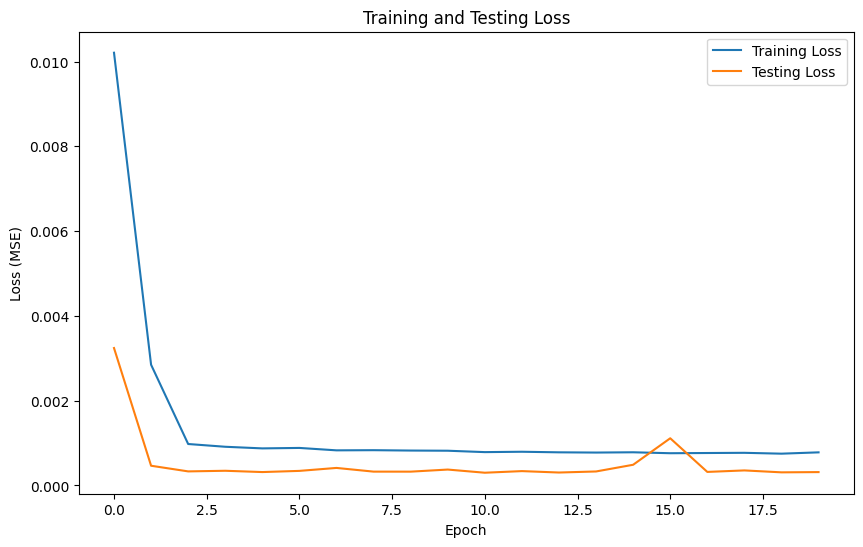

In [41]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

In [42]:
forecast = model.predict(X_test)
forecast = scaler.inverse_transform(forecast)
y_test_ori = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_ori, forecast)
print(f'Mean Squared Error on Test Data: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {rmse}')

54/54 [==============================] - 5s 53ms/step
Mean Squared Error on Test Data: 32.30664852120112
Root Mean Squared Error on Test Data: 5.683893781660696


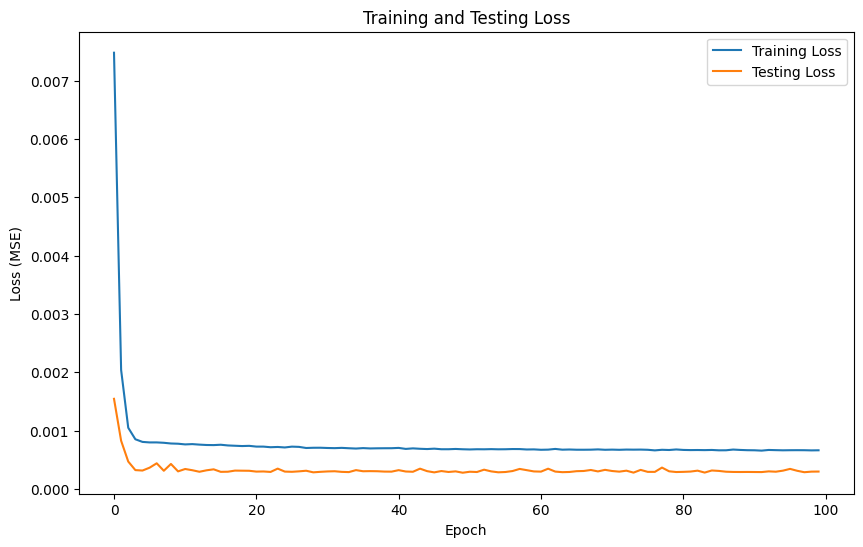

In [20]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

In [21]:
forecast = model.predict(X_test)
forecast = scaler.inverse_transform(forecast)

54/54 [==============================] - 1s 6ms/step


In [22]:
y_test_ori = scaler.inverse_transform(y_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [27]:
mse = mean_squared_error(y_test_ori, forecast)
print(f'Mean Squared Error on Test Data: {mse}')

Mean Squared Error on Test Data: 30.329720690348292


In [26]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {rmse}')

Root Mean Squared Error on Test Data: 5.507242566870311


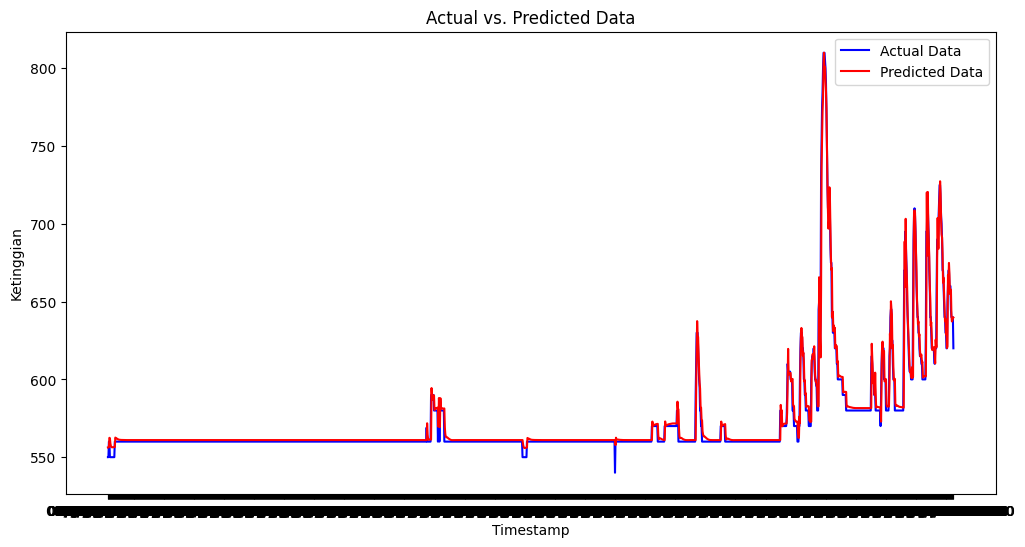

In [28]:
# Plot hasil prediksi dan data asli
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[24:], y_test_ori, label='Actual Data', color='blue')
plt.plot(test_data.index[24:], forecast, label='Predicted Data', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Ketinggian')
plt.title('Actual vs. Predicted Data')
plt.legend()
plt.show()

In [31]:
# Buat prediksi untuk 6 data ke depan setelah data uji
num_predictions = 6
future_predictions = []

# Ambil data terakhir dari X_test sebagai awal
current_sequence = X_test[-1]

for i in range(num_predictions):
    # Reshape current_sequence sesuai dengan input model
    current_sequence_reshaped = current_sequence.reshape((1, 24, 1))

    # Lakukan prediksi menggunakan model
    next_prediction = model.predict(current_sequence_reshaped)[0, 0]

    # Tambahkan prediksi ke daftar future_predictions
    future_predictions.append(next_prediction)

    # Perbarui current_sequence dengan memasukkan next_prediction dan menggeser array
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_prediction

# Inverse transformasi hasil prediksi jika menggunakan normalisasi
if scaler is not None:
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tampilkan hasil prediksi
print("Future Predictions:\n", future_predictions)

1/1 [==============================] - 0s 16ms/step
Future Predictions:
 [[639.7726 ]
 [639.7354 ]
 [639.9692 ]
 [640.3504 ]
 [640.7897 ]
 [641.21436]]


In [32]:
# Jumlah data yang ingin diprediksi ke depan
num_predictions = 6

# Ambil data terakhir dari test_data sebagai awal prediksi
current_data = X_test[-1].tolist()

# Inisialisasi list untuk menyimpan hasil prediksi
predictions = []

# Loop untuk membuat prediksi
for _ in range(num_predictions):
    # Reshape data ke bentuk yang sesuai untuk model
    current_data_reshaped = np.array(current_data).reshape((1, 24, 1))

    # Lakukan prediksi
    next_prediction = model.predict(current_data_reshaped)
    next_prediction_original_scale = scaler.inverse_transform(next_prediction)

    # Tambahkan hasil prediksi ke list
    predictions.append(next_prediction_original_scale[0, 0])

    # Update current_data dengan hasil prediksi
    current_data = np.roll(current_data, -1)
    current_data[-1] = next_prediction[0, 0]

# Buat DataFrame untuk menampilkan hasil prediksi
pred_df = pd.DataFrame({
    'timestamp': pd.date_range(start=test_data.index[-1], periods=num_predictions + 1, freq='H')[1:],
    'ketinggian': predictions
})

pred_df['ketinggian'] = pred_df['ketinggian'].astype(int)
pred_df['timestamp'] = pd.to_datetime(pred_df['timestamp'])
pred_df['timestamp'] = pred_df['timestamp'].dt.strftime('%d/%m/%Y %H:%M')

pred_df


1/1 [==============================] - 0s 16ms/step


,timestamp,ketinggian
0,16/11/2023 13:00,639
1,16/11/2023 14:00,639
2,16/11/2023 15:00,639
3,16/11/2023 16:00,640
4,16/11/2023 17:00,640
5,16/11/2023 18:00,641


In [109]:
update_df = pd.concat([df, pred_df], ignore_index=True)
update_df

,timestamp,ketinggian
0,01/11/2021 0:00,660
1,01/11/2021 1:00,660
2,01/11/2021 2:00,660
3,01/11/2021 3:00,660
4,01/11/2021 4:00,660
...,...,...
17436,16/11/2023 14:00,639
17437,16/11/2023 15:00,640
17438,16/11/2023 16:00,640
17439,16/11/2023 17:00,640


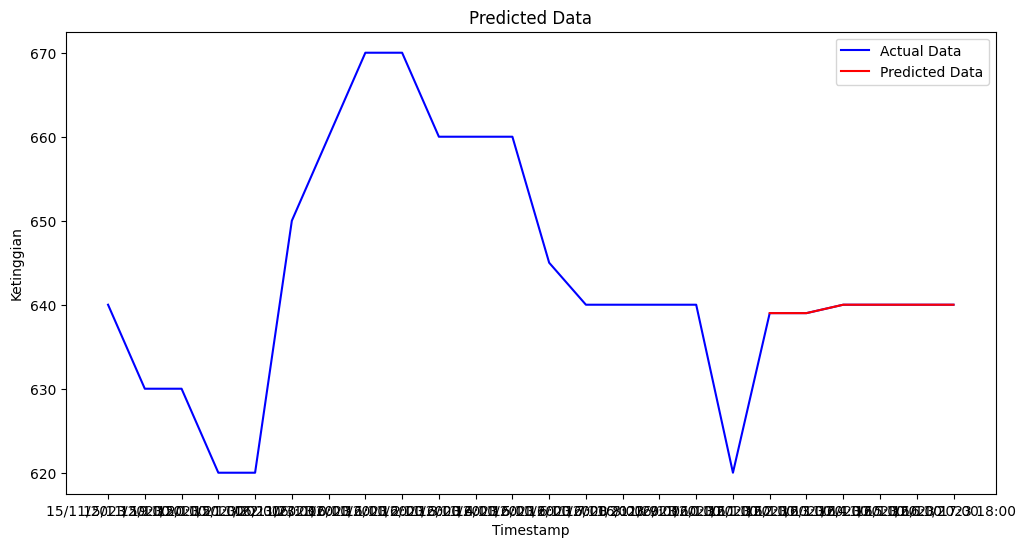

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(update_df['timestamp'][-24:], update_df['ketinggian'][-24:], label='Actual Data', color='blue')
plt.plot(update_df['timestamp'][-6:], update_df['ketinggian'][-6:], label='Predicted Data', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Ketinggian')
plt.title('Predicted Data')
plt.legend()
plt.show()

In [110]:
update_df.to_csv('terbaru.csv', index=False)

In [67]:
X_train, y_train, X_test, y_test, test_data = prepare_data_model(df, test_size=0.1, sequence_length=24)

# Bangun model LSTM
lstm_model = build_lstm_model(sequence_length=24)

# Latih model LSTM
model, history = train_lstm_model(lstm_model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32)

Epoch 1/20
490/490 - 15s - loss: 100156.3281 - val_loss: 36318.4648 - 15s/epoch - 31ms/step
Epoch 2/20
490/490 - 14s - loss: 31044.1504 - val_loss: 16750.0430 - 14s/epoch - 29ms/step
Epoch 3/20
490/490 - 14s - loss: 14900.6016 - val_loss: 9492.8184 - 14s/epoch - 29ms/step
Epoch 4/20
490/490 - 13s - loss: 9705.1055 - val_loss: 6582.6011 - 13s/epoch - 27ms/step
Epoch 5/20
490/490 - 13s - loss: 6274.7603 - val_loss: 3164.5015 - 13s/epoch - 26ms/step
Epoch 6/20
490/490 - 11s - loss: 3469.7749 - val_loss: 2144.7852 - 11s/epoch - 22ms/step
Epoch 7/20
490/490 - 11s - loss: 2501.8018 - val_loss: 1452.2874 - 11s/epoch - 22ms/step
Epoch 8/20
490/490 - 14s - loss: 1811.4526 - val_loss: 1030.6735 - 14s/epoch - 29ms/step
Epoch 9/20
490/490 - 11s - loss: 1385.4698 - val_loss: 768.5945 - 11s/epoch - 23ms/step
Epoch 10/20
490/490 - 9s - loss: 1187.7271 - val_loss: 633.9413 - 9s/epoch - 18ms/step
Epoch 11/20
490/490 - 14s - loss: 1099.3992 - val_loss: 650.6940 - 14s/epoch - 28ms/step
Epoch 12/20
490/49

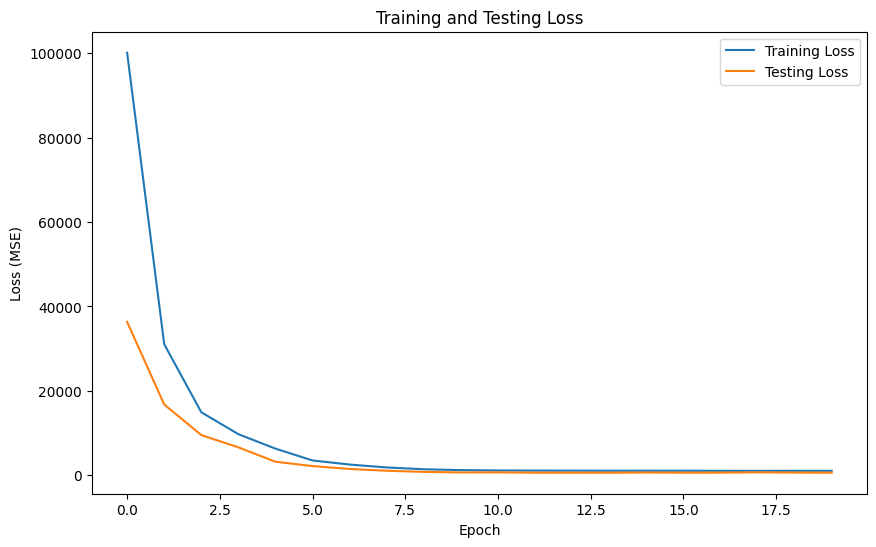

In [70]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

In [30]:
save_model(model, 'model64.h5')